# Week 47

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## Qualitative description of Michaelis-Menten kinetics

In [2]:
import fysisk_biokemi.widgets as fbw
from fysisk_biokemi.widgets.utils import enable_custom_widget_colab, disable_custom_widget_colab

import plotly
from IPython.display import display, HTML
enable_custom_widget_colab()
fbw.michaelis_menten_demo()

Use the widget created by the cell above to answer the following the
questions.

#### (a)

Setting $V_\mathrm{max} = 400$ and $[E]_\mathrm{tot} = 0.0005$, change
$K_M$ from 0.5 to 5 to 10 to 50. Describe the change in curve appearance
and explain it using the Michaelis-Menten (MM) equation.

#### (b)

What is the biological meaning of $K_M$?

#### (c)

Now set $[E]_\mathrm{tot} = 0.0005$, and $K_M = 5$, change
$V_\mathrm{max}$ from 40 to 100 to 900. Do you observe any changes?
Explain your answer using the widget and the MM equation

#### (d)

Now set $K_M = 5$ and $V_\mathrm{max} = 100$, change $[E]_\mathrm{tot}$
from 0.0005 to 0.05. Do you observe any change in curve appearance, in
kcat or in kcat/KM? Explain your answer

------------------------------------------------------------------------

#### The Michaelis Menten equation

Consider a reaction catalyzed by an enzyme obeying the Michaelis-Menten
kinetics model.

$$
E + S \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \stackrel{k_2}{\rightarrow} E + P
$$

$$
V_0 = V_{\mathrm{max}} \frac{[S]}{[S] + K_M}
$$

#### (a) Enzyme saturation

Explain what is meant by enzyme saturation.

#### (b)

Calculate the level of enzyme saturation, $f_{ES}$, at substrate
concentrations of

-   $[S] = 0.1 \cdot K_M$
-   $[S] = 0.5 \cdot K_M$
-   $[S] = 1 \cdot K_M$
-   $[S] = 10 \cdot K_M$
-   $[S] = 100 \cdot K_M$

------------------------------------------------------------------------

The Michaelis-Menten constant KM is defined as:

$$
K_M = \frac{k_{-1}+ k_2}{k_1}
$$

#### (c) Calulate $K_m$

In a specific reaction, the following rate constants were determined:

-   $k_1 = 7 \cdot 10^7 \cdot \mathrm{M}^{-1}\cdot \mathrm{s}^{-1}$,
-   $k^{-1} = 8 \cdot 10^5 \ \mathrm{s}^{-1}$
-   $k_2 = 10^3 \ \mathrm{s}^{-1}$

Calculate the value of $K_M$. Does $K_M$ approximate the dissociation
constant for the $ES$ complex in this case?

#### (d) Calculate $k_2$

Assume that a solution of an enzyme at a concentration of
$1 \cdot 10^{-7} \ \mathrm{M}$ with a substrate concentration of
$[S]=100\cdot K_M$ has
$V_0=10^{-4} \ \mathrm{M} \cdot \mathrm{min}^{-1}$

Given this information and with your answers to (b) and (c) in mind,
calculate the constant $k_2$. What is this constant also called?

#### (e) Lineweaver-Burk plot

The values of $V_\mathrm{max}$ and $K_M$ have historically been
determined from a Lineweaver-Burk plot.

How does the x- and y-intercepts in a Lineweaver-Burk plot relate to
$V_\mathrm{max}$ and $K_M$?

------------------------------------------------------------------------

## Enzyme inhibitors (I)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
pd.set_option('display.max_rows', 6)

An enzyme obeying the Michaelis-Menten kinetics model was tested for
substrate conversion in the absence and presence of an inhibitor, called
inhibitor1 at a concentration of
$[\textrm{I}] = 2.5 \cdot 10^{-3} \ \textrm{M}$. The data set is
contained in the file `week49_6_inhib.xlsx`. Using this data a
researcher wanted to determine the type of inhibition.

Start by loading the dataset

In [4]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [5]:
df = uploader.get_dataframe()
display(df)

In [6]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_6') # Load from package for the solution so it doesn't require to interact.
display(df)

39 rows × 3 columns

#### (a) Convert units

Convert the concentrations of substrate and the initial velocities to
units given in M and $\mathrm{M}\cdot \mathrm{s}^{-1}$, respectively.

In [8]:
df['[S]_(M)'] = df['[S]_(mM)'] * 10**(-3)
df['V0_no_inhib_(M/s)'] = df['V0_no_inhib_(uM/s)'] * 10**(-6)
df['V0_inhib_(M/s)'] = df['V0_inhib_(uM/s)'] * 10**(-6)
display(df)

39 rows × 6 columns

#### (b) Plot

Plot the initial velocities of both experiments as a function of
substrate concentration in one plot. Estimate $k_\mathrm{cat}$ and
$V_\mathrm{max}$ in the presence and absence of inhibitor from the plot.

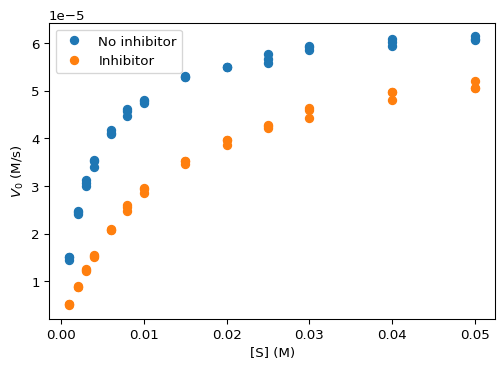

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['[S]_(M)'], df['V0_no_inhib_(M/s)'], 'o', label='No inhibitor')
ax.plot(df['[S]_(M)'], df['V0_inhib_(M/s)'], 'o', label='Inhibitor')

ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')
ax.legend()

------------------------------------------------------------------------

The researcher wanted to determine $V_\mathrm{max}$ and $K_M$ values for
both experiments in order to correctly conclude on the type of
inhibitor.

#### (c)

Determine $V_\mathrm{max}$ and $K_M$ by fitting.

Start writing the function to fit with

In [12]:
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (S + Km)

And use the `curve_fit`-function to find the parameters

In [14]:
# No inhibitor: 
popt, _ = curve_fit(michaelis_menten, df['[S]_(M)'], df['V0_no_inhib_(M/s)'])
vmax, km = popt

# With inhibitor
popt, _ = curve_fit(michaelis_menten, df['[S]_(M)'], df['V0_inhib_(M/s)'])
vmax_inhib, km_inhib = popt

# Printing
print('Without inhibitor:')
print(f'\t V_max = {vmax:.2e}')
print(f'\t Km = {km:.2e}')
print('With inhibitor:')
print(f'\t V_max = {vmax_inhib:.2e}')
print(f'\t Km = {km_inhib:.2e}')

Without inhibitor:
     V_max = 6.50e-05
     Km = 3.41e-03
With inhibitor:
     V_max = 6.37e-05
     Km = 1.22e-02

#### (d)

What type of inhibitor is inhibitor1?

#### (e)

Calculate $K_i$.  

------------------------------------------------------------------------

## Enzyme inhibitors (II)

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
pd.set_option('display.max_rows', 6)

Two enzyme inhibitors were identified as part of a drug discovery
program. To characterize the mechanism of action, the reaction kinetics
were analysed for the enzyme alone and in the presence of 5 $\mu$M of
each of the inhibitors as a function of substrate concentration
resulting in the data in the file `week49_7_inhib_II.xlsx`

Load the dataset

In [16]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [17]:
df = uploader.get_dataframe()
display(df)

In [18]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_7') # Load from package for the solution so it doesn't require to interact.
display(df)

33 rows × 4 columns

#### (a) Convert & plot

Convert the measurements to SI units and plot the reaction rate against
time for all three reactions.

Start by converting the units

In [20]:
df['[S]_(M)'] = df['[S]_(uM)'] * 10**(-6)
df['enz_(M/s)'] = df['enz_(nM/s)'] * 10**(-9)
df['inhibitor2_(M/s)'] = df['inhibitor2_(nM/s)'] * 10**(-9)
df['inhibitor3_(M/s)'] = df['inhibitor3_(nM/s)'] * 10**(-9)

And then plot

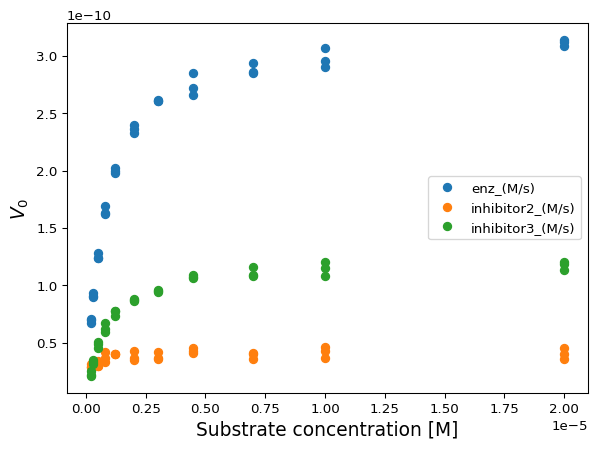

In [22]:
fig, ax = plt.subplots()

col_names = ['enz_(M/s)', 'inhibitor2_(M/s)', 'inhibitor3_(M/s)']

for col_name in col_names:
    ax.plot(df['[S]_(M)'], df[col_name], 'o', label=col_name)

ax.legend()
ax.set_xlabel('Substrate concentration [M]', fontsize=14)
ax.set_ylabel('$V_0$', fontsize=14)
plt.show()

Based on the appearance of these plots:

-   Can you determine the type of inhibition?
-   Alternatively, can you exclude some mechanisms?

#### (b) Intuit parameters

Based on your answer to in (a) what do you expect for the parameters
$K_M$ and $V_\mathrm{max}$?

-   Which dataset would have the highest $V_\mathrm{max}$, which the
    lowest?
-   What about $K_M$?

#### (c) Fit

As always, we need the function we’re fitting with

In [23]:
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (S + Km)

Given we’re fitting on multiple datasets we will make our lives a bit
easier by making a little function

In [25]:
def fit_parameters(df, col_name):
    popt, _ = curve_fit(michaelis_menten, df['[S]_(M)'], df[col_name])
    vmax, km = popt
    # Printing
    print(f'{col_name}:')
    print(f'\t V_max = {vmax:.2e}')
    print(f'\t Km = {km:.2e}')

In [27]:
for col_name in col_names:
    fit_parameters(df, col_name)

enz_(M/s):
     V_max = 3.61e+00
     Km = 1.49e+05
inhibitor2_(M/s):
     V_max = 6.63e-02
     Km = 1.94e+04
inhibitor3_(M/s):
     V_max = 9.36e-02
     Km = 1.02e+04

#### (d) Change

In the fits above you will likely see that all the fitted parameters
change between the different data sets – some by a little and some by a
lot. How big does a change have to be to be considered significant?

#### (e) $K_i$

Determine the $K_i$ for each of the two inhibitors.

------------------------------------------------------------------------

## A snake dependent enzyme

When (or *if* depending on your outlook in life) you are bit by a cobra,
the snake protein CVF interacts with the human protein FB to form a
proteolytically active enzyme in the blood called CVF:FB. CVF:FB enzyme
is able to cleave another human protein known as C5 into C5b and C5a
(C5a is the protein you visually inspected in your first PyMOL session).
With C5 as a substrate, CVF:FB obeys the Michaelis-Menten kinetics
model, whereas CVF alone does not show any catalytic activity towards
C5.

Now consider two different CVF proteins, CVF1 and CVF2 from two
different cobra species. Upon characterization it was found that CVF1:FB
has a $K_M = 0.036 \ \mu\text{M}$ and a
$k_{cat} = 0.43 \ \mathrm{min}^{-1}$, whereas CVF2:FB has a
$K_M = 14 \mu\mathrm{M}$ and a $k_{cat} = 0.73 \ \mathrm{min}^{-1}$. The
concentration of C5 in blood is $0.37 \ \mu\mathrm{M}$.

#### (a)

Convert the given $K_M$ values and the C5 concentration to SI-units
given in $\mathrm{M}$

In [29]:
# CVF1
K_m_cvf1 = 0.036 * 10**(-6)
k_cat_cvf1 = 0.43 / 60

# CVF2
K_m_cvf2 = 14 * 10**(-6)
k_cat_cvf2 = 0.73 / 60

# Concentration
C_c5 = 0.37 * 10**(-6)

#### (b)

Assuming that \[CVF1:FB\] $=$ \[CVF2:FB\]
$= 0.1\cdot 10^{-6} \ \mathrm{M}$, calculate $V_\mathrm{max}$ of both
enzymes.

In [31]:
V_max_cfv1 = k_cat_cvf1 * 0.1 * 10**(-6)
V_max_cfv2 = k_cat_cvf2 * 0.1 * 10**(-6)

print(f"{V_max_cfv1 = :.3e}")
print(f"{V_max_cfv2 = :.3e}")

V_max_cfv1 = 7.167e-10
V_max_cfv2 = 1.217e-09

#### (c)

Calculate the fraction of enzyme:substrate complexes (CVFx:FB:C5) in
blood.

In [33]:
theta_cfv1 = C_c5 / (K_m_cvf1 + C_c5)
theta_cfv2 = C_c5 / (K_m_cvf2 + C_c5)

print(f"{theta_cfv1 = :.3f}")
print(f"{theta_cfv2 = :.3f}")

theta_cfv1 = 0.911
theta_cfv2 = 0.026

#### (d)

Calculate the initial velocities of C5 cleavage in blood by the two
enzymes.

In [35]:
v0_cfv1 = (V_max_cfv1 * C_c5) / (K_m_cvf1 + C_c5)
v0_cfv2 = (V_max_cfv2 * C_c5) / (K_m_cvf2 + C_c5)

print(f"{v0_cfv1 = :.3e}")
print(f"{v0_cfv2 = :.3e}")

v0_cfv1 = 6.531e-10
v0_cfv2 = 3.133e-11

#### (f)

Which of the two enzymes, CVF1:FB or CVF2:FB, cleaves the most C5
molecules in blood?

------------------------------------------------------------------------

## Enzymatic behaviour of the enzyme ATCase

In [36]:
import matplotlib.pyplot as plt

The enzyme aspartate transcarbamoylase (ATCase) catalyzes the first
reaction in the biosynthesis of pyrimidines such as CTP as shown in the
reaction below:

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/atcase.png)

ATCase does not obey the Michaelis-Menten kinetics model but instead
shows the behaviour recorded in the `atcase_enzyme.csv` dataset.

The dataset consists of three columns; the aspartate concentration in mM
and the rate of formation of N-carbamyolaspartate with and without the
presence of CTP.

Load the dataset with the widget below

In [37]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [38]:
df = uploader.get_dataframe()
display(df)

In [39]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('atcase') # Load from package for the solution so it doesn't require to interact.
display(df)

100 rows × 3 columns

#### (a) Plot the dataset

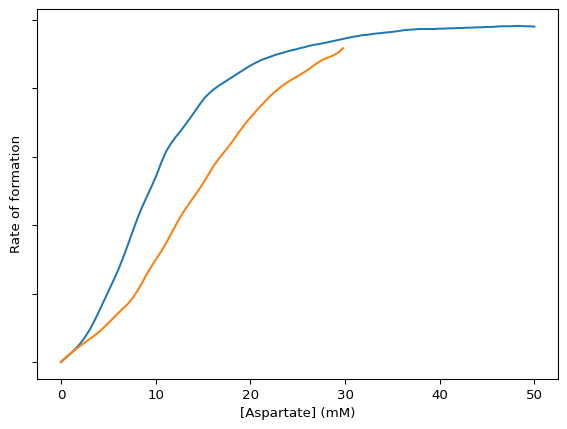

In [41]:
fig, ax = plt.subplots()

ax.plot(df['aspartate'], df['without_ctp'], label='No CTP')
ax.plot(df['aspartate'], df['with_ctp'], label='With CTP')

ax.set_xlabel('[Aspartate] (mM)')
ax.set_ylabel('Rate of formation')
ax.set_yticklabels([]);

#### (b) Kinetic profile

Describe the kinetic profile of ATCase and explain what it tells us
about the way ATCase works. (You may find inspiration in the material
previously covered on protein-ligand interactions)

#### (c) Quarternary structure

What does the figure tell us about the quaternary structure of ATCase?

#### (d) DNA synthesis

Which other pyrimidine based trinucleotide besides CTP is used to
synthesize DNA?

#### (e) Effect of CTP

Qualitatively describe the effect of CTP on the rate of
N-carbamyolaspartate formation

#### (f) Physiological advantage

In fact many enzymes are regulated by certain end products in a fashion
similar to the CTP effect on ATCase. Can you explain why this might be a
physiological advantage?